In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import __version__ as sklearn_version
from sklearn.model_selection import train_test_split

df_tree = pd.read_csv('C:/Users/MI/Desktop/testing.csv')
df_tree.head()

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,1,67,51,68,115,69,111,136,31,67,...,-9.17,-18.27,-1.80,-6.32,-20.88,-1.63,-6.13,-22.56,-5.53,-8.11
1,4,67,28,51,99,50,97,82,26,59,...,-2.25,-20.13,-2.11,-6.35,-21.94,-1.22,-6.13,-22.20,-3.41,-6.57
2,4,63,26,50,95,49,91,81,26,57,...,-0.44,-17.64,-1.81,-4.70,-19.39,-0.65,-5.01,-20.89,-3.96,-6.85
3,1,63,42,63,97,66,108,111,28,59,...,-2.34,-20.20,-1.89,-5.47,-21.65,-0.99,-5.71,-22.19,-3.41,-6.52
4,4,46,27,50,83,51,90,76,26,56,...,1.25,-18.62,-2.17,-7.11,-21.12,-1.56,-6.35,-22.19,-4.45,-7.32


In [2]:
from sklearn.model_selection import train_test_split

X, y = df_tree.iloc[:, 1:].values, df_tree.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, 
                     stratify=y,
                     random_state=0)

In [3]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [4]:
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[1.06855934e+01 4.92019641e+00 3.96842969e+00 2.03191267e+00
 1.25919178e+00 1.20209400e+00 8.23381333e-01 7.06145900e-01
 4.51789282e-01 3.74713644e-01 2.22494992e-01 1.43248594e-01
 1.15536642e-01 6.95704345e-02 4.60398257e-02 2.93361404e-02
 2.67442358e-02 1.63344600e-02 1.30514986e-02 7.15928125e-03
 3.26818986e-03 1.55584081e-03 1.08717371e-03 3.75357449e-04
 1.76831632e-04 8.56634286e-06 3.28937137e-05]


In [5]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

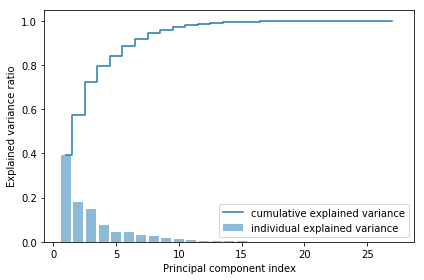

In [6]:
import matplotlib.pyplot as plt


plt.bar(range(1, 28), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1, 28), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('images/05_02.png', dpi=300)
plt.show()

In [7]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [8]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[ 0.10611288 -0.04703787]
 [ 0.27146895  0.09143578]
 [ 0.26849215  0.08551572]
 [ 0.06534277 -0.02195469]
 [ 0.2714055   0.10410243]
 [ 0.26490198  0.08837043]
 [ 0.16691515  0.0188757 ]
 [ 0.26549213  0.05141005]
 [ 0.2703541   0.04483671]
 [-0.11458977  0.09467454]
 [-0.26895407 -0.07651713]
 [-0.26062013 -0.05315034]
 [-0.08801254  0.10556107]
 [-0.27167613 -0.09775893]
 [-0.26993443 -0.05954421]
 [-0.1748622   0.0302854 ]
 [-0.26539528 -0.03312657]
 [-0.27138814 -0.02168505]
 [ 0.06608763 -0.26320887]
 [ 0.03639323 -0.24361788]
 [ 0.04978601 -0.31704338]
 [ 0.08861071 -0.295265  ]
 [ 0.07283079 -0.32533143]
 [ 0.07236562 -0.37411458]
 [ 0.08707284 -0.33039877]
 [ 0.05848068 -0.3260726 ]
 [ 0.05811966 -0.36876401]]


In [9]:
X_train_std[0].dot(w)

array([-0.92214424, -2.31385471])

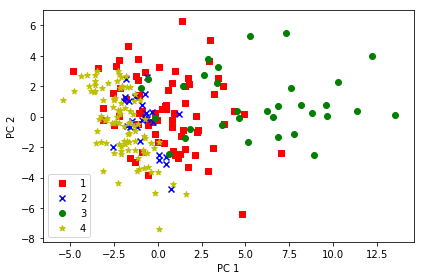

In [10]:
X_train_pca = X_train_std.dot(w)
colors = ['r', 'b', 'g', 'y']
markers = ['s', 'x', 'o', '*']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], 
                X_train_pca[y_train == l, 1], 
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_03.png', dpi=300)
plt.show()

In [11]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([3.94019269e-01, 1.81426724e-01, 1.46331394e-01, 7.49245004e-02,
       4.64312843e-02, 4.43258677e-02, 3.03612631e-02, 2.60383380e-02,
       1.66592230e-02, 1.38171453e-02, 8.20425327e-03, 5.28213121e-03,
       4.26028409e-03, 2.56533173e-03, 1.69766693e-03, 1.08173727e-03,
       9.86163694e-04, 6.02314891e-04, 4.81259369e-04, 2.63990465e-04,
       1.20510835e-04, 5.73698846e-05, 4.00883109e-05, 1.38408849e-05,
       6.52046808e-06, 1.21291879e-06, 3.15874284e-07])

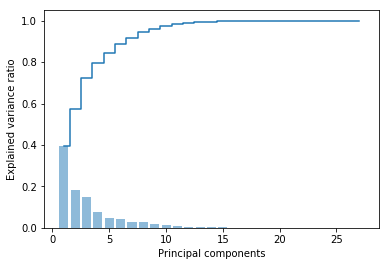

In [12]:
plt.bar(range(1, 28), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 28), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()

In [13]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

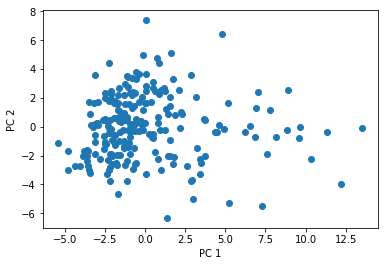

In [14]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

In [15]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '*', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

In [16]:
from sklearn.linear_model import LogisticRegression

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr = LogisticRegression()
lr = lr.fit(X_train_pca, y_train)

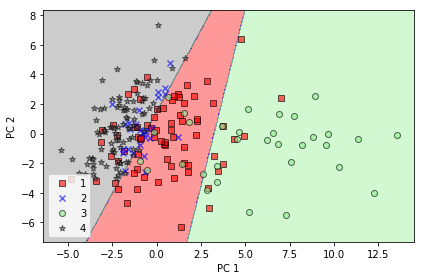

In [17]:
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_04.png', dpi=300)
plt.show()

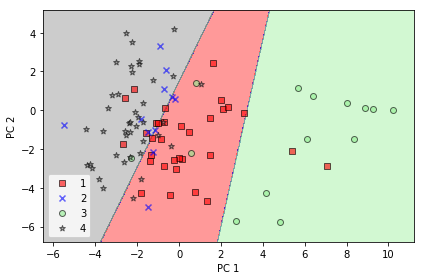

In [18]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_05.png', dpi=300)
plt.show()

In [20]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([3.94019269e-01, 1.81426724e-01, 1.46331394e-01, 7.49245004e-02,
       4.64312843e-02, 4.43258677e-02, 3.03612631e-02, 2.60383380e-02,
       1.66592230e-02, 1.38171453e-02, 8.20425327e-03, 5.28213121e-03,
       4.26028409e-03, 2.56533173e-03, 1.69766693e-03, 1.08173727e-03,
       9.86163694e-04, 6.02314891e-04, 4.81259369e-04, 2.63990465e-04,
       1.20510835e-04, 5.73698846e-05, 4.00883109e-05, 1.38408849e-05,
       6.52046808e-06, 1.21291879e-06, 3.15874284e-07])

In [21]:
#Supervised data compression via linear discriminant analysis

np.set_printoptions(precision=4)

mean_vecs = []
for label in range(1, 5):
    mean_vecs.append(np.mean(X_train_std[y_train == label], axis=0))
    print('MV %s: %s\n' % (label, mean_vecs[label - 1]))

MV 1: [-0.4414  0.3952  0.2993 -0.1064  0.3085  0.1966  0.3765 -0.155  -0.2282
  0.4008 -0.4067 -0.3248  0.1087 -0.3124 -0.2122 -0.3648  0.1731  0.2415
  0.0179 -0.0781 -0.1207  0.0796 -0.0217 -0.0581  0.027  -0.0273 -0.0294]

MV 2: [ 1.4872 -0.667  -0.4994  1.3482 -0.7011 -0.457   0.5456 -0.3557 -0.0495
 -1.3856  0.6292  0.4368 -1.2988  0.6802  0.4077 -0.4905  0.3372  0.031
 -0.2502 -0.0751 -0.1883  0.0659 -0.2403 -0.1545 -0.1773 -0.171  -0.1188]

MV 3: [ 0.2176  1.6155  1.6314 -0.0609  1.7544  1.6869  0.2533  1.7979  1.7215
 -0.2356 -1.5674 -1.5211  0.0019 -1.747  -1.6798 -0.2838 -1.7844 -1.7077
  0.2126  0.0498  0.1181  0.1548  0.2676  0.1816  0.2431  0.0789  0.0155]

MV 4: [-0.1568 -0.6583 -0.6376 -0.2809 -0.6287 -0.5894 -0.5297 -0.3854 -0.3904
  0.1652  0.6617  0.6378  0.285   0.6352  0.613   0.5153  0.3722  0.3809
 -0.0142  0.0646  0.1065 -0.1321 -0.0052  0.0274 -0.0523  0.043   0.0511]



In [32]:
d = 27 # number of features
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 5), mean_vecs):
    class_scatter = np.zeros((d, d))  # scatter matrix for each class
    for row in X_train_std[y_train == label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)  # make column vectors
        class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter                          # sum class scatter matrices

print('Within-class scatter matrix: %sx%s' % (S_W.shape[0], S_W.shape[1]))

Within-class scatter matrix: 27x27


In [33]:
mean_overall = np.mean(X_train_std, axis=0)
d = 27  # number of features
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
    n = X_train[y_train == i + 1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1)  # make column vector
    mean_overall = mean_overall.reshape(d, 1)  # make column vector
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)

print('Between-class scatter matrix: %sx%s' % (S_B.shape[0], S_B.shape[1]))

Between-class scatter matrix: 27x27


In [34]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [25]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in descending order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigenvalues in descending order:

10.68559336317891
4.920196412447349
3.9684296943070314
2.031912666885453
1.2591917767480307
1.202093996151542
0.823381332896346
0.7061459001608195
0.4517892818503362
0.3747136437551441
0.22249499239461792
0.14324859362863354
0.1155366424695009
0.06957043449611605
0.046039825699425406
0.0293361403679891
0.02674423575774143
0.016334460033167
0.013051498558525037
0.007159281248718436
0.003268189860534432
0.0015558408086275132
0.0010871737063568928
0.00037535744918041594
0.00017683163207845093
3.289371367362622e-05
8.56634285660032e-06


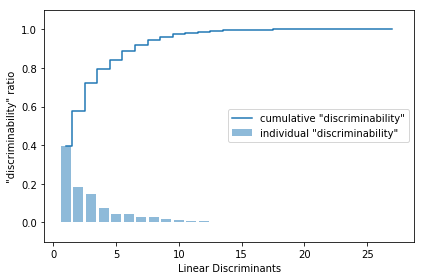

In [26]:
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)

plt.bar(range(1, 28), discr, alpha=0.5, align='center',
        label='individual "discriminability"')
plt.step(range(1, 28), cum_discr, where='mid',
         label='cumulative "discriminability"')
plt.ylabel('"discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('images/05_07.png', dpi=300)
plt.show()

In [27]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,
              eigen_pairs[1][1][:, np.newaxis].real))
print('Matrix W:\n', w)

Matrix W:
 [[ 0.1061 -0.047 ]
 [ 0.2715  0.0914]
 [ 0.2685  0.0855]
 [ 0.0653 -0.022 ]
 [ 0.2714  0.1041]
 [ 0.2649  0.0884]
 [ 0.1669  0.0189]
 [ 0.2655  0.0514]
 [ 0.2704  0.0448]
 [-0.1146  0.0947]
 [-0.269  -0.0765]
 [-0.2606 -0.0532]
 [-0.088   0.1056]
 [-0.2717 -0.0978]
 [-0.2699 -0.0595]
 [-0.1749  0.0303]
 [-0.2654 -0.0331]
 [-0.2714 -0.0217]
 [ 0.0661 -0.2632]
 [ 0.0364 -0.2436]
 [ 0.0498 -0.317 ]
 [ 0.0886 -0.2953]
 [ 0.0728 -0.3253]
 [ 0.0724 -0.3741]
 [ 0.0871 -0.3304]
 [ 0.0585 -0.3261]
 [ 0.0581 -0.3688]]


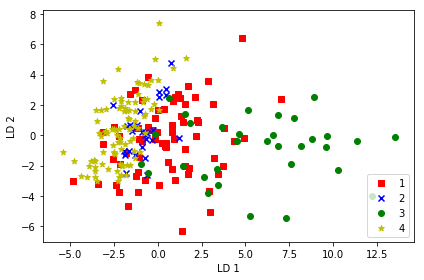

In [28]:
X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g', 'y']
markers = ['s', 'x', 'o', '*']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train == l, 0],
                X_train_lda[y_train == l, 1] * (-1),
                c=c, label=l, marker=m)

plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()
# plt.savefig('images/05_08.png', dpi=300)
plt.show()

In [29]:
#LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

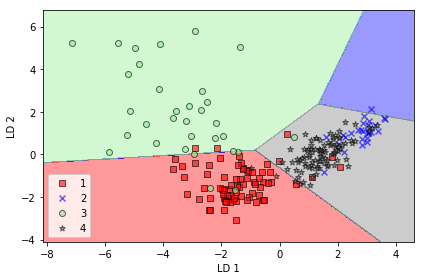

In [30]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr = lr.fit(X_train_lda, y_train)

plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_09.png', dpi=300)
plt.show()

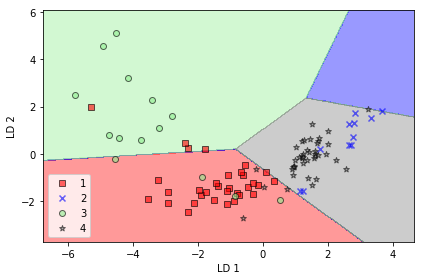

In [31]:
X_test_lda = lda.transform(X_test_std)

plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_10.png', dpi=300)
plt.show()